In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from math import log, sqrt, exp
from scipy.stats import norm

Definimos primeiramente um simples portifólio, para implementarmos o delta hedging em python.

Seja $$\pi(t_i, S) = V_c(t_i) - \Delta(t_i)S_i,$$

onde,
 - $t_i$: é o tempo de estudo, onde $0 \leq i \leq t$;
 - $V_c(t_i)$: é o valor da opção no tempo $i$;
 - $\Delta(t_i)$: é a derivada $\frac{\delta V_c(t_i)}{\delta S(t_i)}$;
 - $S_i$: é o valor do ativo no tempo $i$.

#### Definindo o comportamento do ativo

Nesse caso, vamos assumir que o ativo segue um Geometric Brownian Motion (GBM):

$$
S_t = S_0 \exp ( (\mu - \sigma^2/2)t + \sigma W_t),
$$

onde: 
- $\mu$ é o valor esperado de retorno;
- $\sigma$ é a volatilidade do ativo

In [ ]:
#np.random.seed(42)

S0 = 100          # initial asset price
K = 100           # strike price
mu = 0.05         # expected return of asset
sigma = 0.20      # volatility
r = 0.03          # risk‑free rate
T_days = 30       # days until option maturity
steps = T_days    # daily steps
dt = 1/365   

In [9]:
S = np.zeros(steps + 1)
S[0] = S0
for t in range(1, steps + 1):
    z = np.random.normal()
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * z)

### Equação de Black-Scholes

In [10]:
C = np.zeros_like(S)
for t in range(steps + 1):
    tau = (T_days - t) / 365  # time to maturity in years
    if tau > 0:
        d1 = (log(S[t] / K) + (r + 0.5 * sigma**2) * tau) / (sigma * sqrt(tau))
        d2 = d1 - sigma * sqrt(tau)
        C[t] = S[t] * norm.cdf(d1) - K * exp(-r * tau) * norm.cdf(d2)
    else:  # at maturity use payoff
        C[t] = max(S[t] - K, 0)

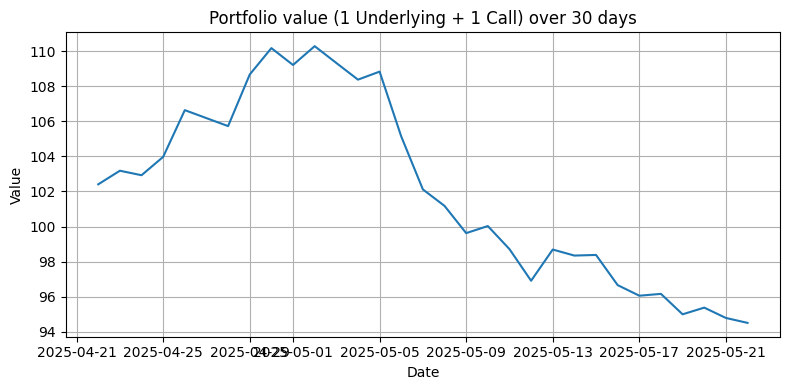

In [11]:

# -----------------------------
# Portfolio value: long 1 underlying + long 1 call
# -----------------------------
V_port = S + C

# -----------------------------
# Build DataFrame
# -----------------------------
start_date = datetime(2025, 4, 22)
dates = [start_date + timedelta(days=i) for i in range(steps + 1)]

df = pd.DataFrame({
    'Date': dates,
    'Underlying': S,
    'CallPrice': C,
    'PortfolioValue': V_port
})


# -----------------------------
# Plot portfolio value
# -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['PortfolioValue'])
plt.title('Portfolio value (1 Underlying + 1 Call) over 30 days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()